In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Java Results

In [2]:
!javac Benchmark3.java

In [3]:
%time !java Benchmark3 | tee resultsJava.csv

collection,n,add,remove
java.util.ArrayList,	32,	1.74639E-4,	1.14268E-4
java.util.ArrayList,	64,	1.29514E-4,	1.09239E-4
java.util.ArrayList,	128,	1.16084E-4,	8.2231E-5
java.util.ArrayList,	256,	1.64812E-4,	2.17012E-4
java.util.ArrayList,	512,	2.72928E-4,	4.91651E-4
java.util.ArrayList,	1024,	3.81874E-4,	5.00612E-4
java.util.ArrayList,	2048,	8.09886E-4,	0.001654602
java.util.ArrayList,	4096,	0.001318565,	0.005270216
java.util.ArrayList,	8192,	0.003615851,	0.020523668
java.util.ArrayList,	16384,	0.011819432,	0.096271148
java.util.LinkedList,	32,	1.26937E-4,	5.5929E-5
java.util.LinkedList,	64,	1.30611E-4,	5.2709E-5
java.util.LinkedList,	128,	1.78543E-4,	5.9993E-5
java.util.LinkedList,	256,	2.32873E-4,	1.77077E-4
java.util.LinkedList,	512,	7.6254E-4,	4.89849E-4
java.util.LinkedList,	1024,	0.00351273,	0.001535431
java.util.LinkedList,	2048,	0.023723569,	0.007783412
java.util.LinkedList,	4096,	0.113752785,	0.029034755
java.util.LinkedList,	8192,	0.407669808,	0.109790302
java.util.LinkedList,

In [4]:
data = pd.read_csv("resultsJava.csv")

In [5]:
arrayList = data[data.collection=="java.util.ArrayList"]
linkedList = data[data.collection=="java.util.LinkedList"]
vector = data[data.collection=="java.util.Vector"]

In [6]:
arrayList

,collection,n,add,remove
0,java.util.ArrayList,32,0.000175,0.000114
1,java.util.ArrayList,64,0.000130,0.000109
2,java.util.ArrayList,128,0.000116,0.000082
3,java.util.ArrayList,256,0.000165,0.000217
4,java.util.ArrayList,512,0.000273,0.000492
5,java.util.ArrayList,1024,0.000382,0.000501
6,java.util.ArrayList,2048,0.000810,0.001655
7,java.util.ArrayList,4096,0.001319,0.005270
8,java.util.ArrayList,8192,0.003616,0.020524
9,java.util.ArrayList,16384,0.011819,0.096271


### Insert elements in order (Java)

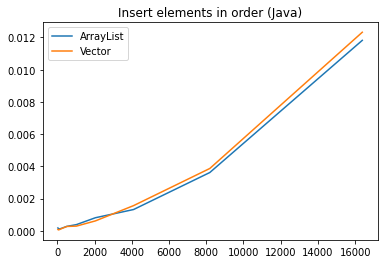

In [7]:
plt.title("Insert elements in order (Java)")
# plt.xscale('log',base=2)
plt.plot(arrayList["n"],arrayList["add"],label="ArrayList")
# plt.plot(linkedList["n"],linkedList["add"],label="LinkedList")
plt.plot(vector["n"],vector["add"],label="Vector")
plt.legend();

### Remove elements (Java)

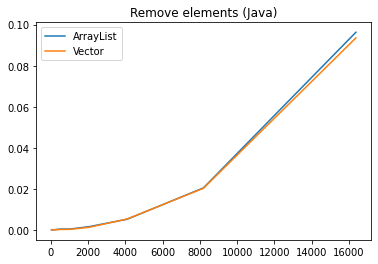

In [8]:
plt.title("Remove elements (Java)")
# plt.xscale('log',base=2)
plt.plot(arrayList["n"],arrayList["remove"],label="ArrayList")
# plt.plot(linkedList["n"],linkedList["remove"],label="LinkedList")
plt.plot(vector["n"],vector["remove"],label="Vector")
plt.legend();

## C++ Results

In [9]:
!g++ -O2 container_exectime.cc -o container_exectime

In [10]:
%time !./container_exectime | tee resultsC++.csv

container,n,insert,remove
list,	32,	2.1e-06,	2.1e-06
list,	64,	4.7e-06,	3.7e-06
list,	128,	2.51e-05,	1.51e-05
list,	256,	7.21e-05,	3.84e-05
list,	512,	0.0002282,	0.0001122
list,	1024,	0.0009343,	0.0004345
list,	2048,	0.0067222,	0.0034137
list,	4096,	0.034445,	0.0165528
list,	8192,	0.1262394,	0.0587857
list,	16384,	0.5908367,	0.2802899
vector,	32,	1.1e-06,	9e-07
vector,	64,	2.8e-06,	1.5e-06
vector,	128,	3.8e-06,	3.1e-06
vector,	256,	3.94e-05,	8.4e-06
vector,	512,	1.74e-05,	2.87e-05
vector,	1024,	5.64e-05,	9.47e-05
vector,	2048,	0.0001614,	0.0003534
vector,	4096,	0.0004582,	0.0013799
vector,	8192,	0.0012337,	0.0053711
vector,	16384,	0.0042417,	0.0198984
CPU times: user 226 ms, sys: 69.9 ms, total: 296 ms
Wall time: 11.7 s


In [11]:
data = pd.read_csv("resultsC++.csv")

In [12]:
cppList = data[data.container=="list"]
cppVector = data[data.container=="vector"]

### Insert elements in order (C++)

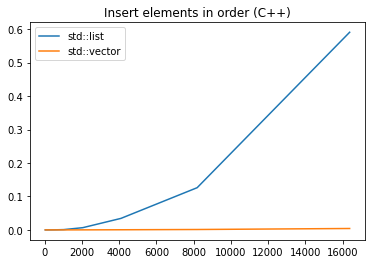

In [13]:
plt.title("Insert elements in order (C++)")
# plt.xscale('log',base=2)
plt.plot(cppList["n"],cppList["insert"],label="std::list")
plt.plot(cppVector["n"],cppVector["insert"],label="std::vector")
plt.legend();

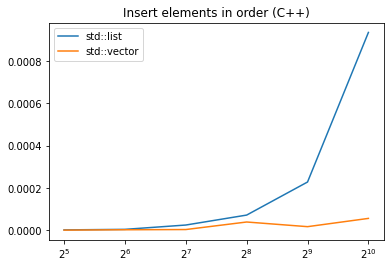

In [14]:
plt.title("Insert elements in order (C++)")
k = 6
plt.xscale('log',base=2)
plt.plot(cppList["n"][:k],cppList["insert"][:k],label="std::list")
plt.plot(cppVector["n"][:k],cppVector["insert"][:k],label="std::vector")
plt.legend();

### Remove elements (C++)

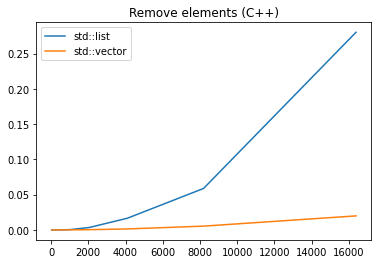

In [15]:
plt.title("Remove elements (C++)")
# plt.xscale('log',base=2)
plt.plot(cppList["n"],cppList["remove"],label="std::list")
plt.plot(cppVector["n"],cppVector["remove"],label="std::vector")
plt.legend();

## Comparison between C++ and Java

### Array-based container/collections

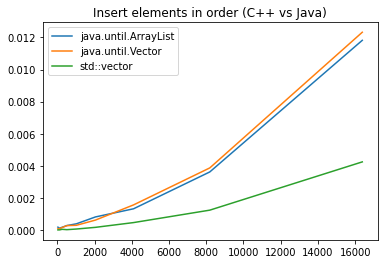

In [16]:
plt.title("Insert elements in order (C++ vs Java)")
# plt.xscale('log',base=2)
plt.plot(arrayList["n"],arrayList["add"],label="java.until.ArrayList")
plt.plot(vector["n"],vector["add"],label="java.until.Vector")
plt.plot(cppVector["n"],cppVector["insert"],label="std::vector")
plt.legend();

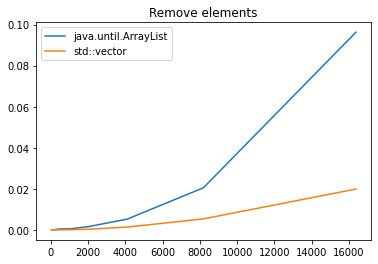

In [17]:
plt.title("Remove elements")
# plt.xscale('log',base=2)
plt.plot(arrayList["n"],arrayList["remove"],label="java.until.ArrayList")
plt.plot(cppVector["n"],cppVector["remove"],label="std::vector")
plt.legend();

### List-based containers/collections

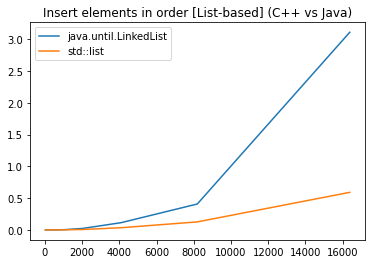

In [18]:
plt.title("Insert elements in order [List-based] (C++ vs Java)")
# plt.xscale('log',base=2)
plt.plot(linkedList["n"], linkedList["add"], label="java.until.LinkedList")
plt.plot(cppList["n"], cppList["insert"], label="std::list")
plt.legend();

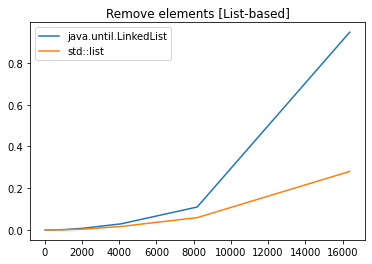

In [19]:
plt.title("Remove elements [List-based]")
# plt.xscale('log',base=2)
plt.plot(linkedList["n"], linkedList["remove"], label="java.until.LinkedList")
plt.plot(cppList["n"], cppList["remove"], label="std::list")
plt.legend();